# Shared Bikes Demand Prediction

## Multiple Linear Regression

### 1. Convert Business Problem to Data Science Problem

**Business Problem:**
A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

`BoomBikes` aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

*	Which variables are significant in predicting the demand for shared bikes.

*	How well those variables describe the bike demands

**Data Science Problem:** To build a model that predicts the future demands for shared bikes with the available independent variables.

To understand which features are responsible for increase in demands of shared bikes so that they can manuipulate their business strategy to meet the demand levels and customer satisfaction.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [177]:
# import important libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


%matplotlib inline

### 2. Load the Data

In [3]:
# Reading the dataset
df = pd.read_csv('../../Datasets/data.csv').drop(columns='instant')

# Print first few rows
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 3. Understand the Data

In [4]:
# Number of Rows and Columns
df.shape

(730, 15)

In [5]:
# Describe the features
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [7]:
num_cols = df.select_dtypes(include=np.number).columns
print('\033[1m'+ 'Numerical Columns:' +'\033[0m')
print(num_cols)

print()

cat_cols = df.select_dtypes(exclude=np.number).columns
print('\033[1m'+ 'Categorical Columns:' +'\033[0m')
print(cat_cols)

Numerical Columns:
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Categorical Columns:
Index(['dteday'], dtype='object')


**NEED TO FIX #1:** Some of features such as `season`, `mnth`, `weekday`, `weathersit` should be *categorical* in nature in order to dummify them. 

### 4. Preprocess the Data

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated in this section.

**FIX #1:** 

#### Season

In [8]:
# Season
# Assigning string values to different seasons instead of numeric values as numeric value bring some order to it.

# 1: spring
df['season'].loc[df['season'] == 1] = 'spring'

# 2: summer
df['season'].loc[df['season'] == 2] = 'summer'

# 3: fall
df['season'].loc[df['season'] == 3] = 'fall'

# 4: winter
df['season'].loc[df['season'] == 4] = 'winter'

In [9]:
# Checking whether the conversions are correct
df['season'] = df['season'].astype('category')

df['season'].unique()

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']

#### Year

In [10]:
# Year (0: 2018, 1: 2019): Binary in nature
df['yr'].unique()

array([0, 1], dtype=int64)

#### Month

In [11]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
df['mnth'] = df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

In [12]:
# Checking whether the conversions are correct
df['mnth'] = df['mnth'].astype('category')

df['mnth'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sept', 'Oct', 'Nov', 'Dec']

#### Holiday

In [13]:
# holiday
# Holiday or not (0: No, 1: Yes): Binary in nature
df['holiday'].unique()

array([0, 1], dtype=int64)

#### Weekday

In [14]:
# weekday
df['weekday'] = df['weekday'].map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

In [15]:
# Checking whether the conversions are correct
df['weekday'] = df['weekday'].astype('category')

df['weekday'].unique()

['Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues']
Categories (7, object): ['Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues']

#### Workingday

In [16]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0: Binary in nature
df['workingday'].unique()

array([1, 0], dtype=int64)

#### Weather Sit

In [17]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
df['weathersit'].loc[df['weathersit'] == 1] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
df['weathersit'].loc[df['weathersit'] == 2] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
df['weathersit'].loc[df['weathersit'] == 3] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df['weathersit'].loc[df['weathersit'] == 4] = 'D'

In [18]:
# Extracting the type of weather situations present in the data
df['weathersit'] = df['weathersit'].astype('category')

df['weathersit'].unique()

['B', 'A', 'C']
Categories (3, object): ['B', 'A', 'C']

In [19]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Wed,1,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Thurs,1,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Fri,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Sat,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Sun,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Date

In [20]:
df['dteday'] = df['dteday'].astype('datetime64')

In [21]:
num_cols = df.select_dtypes(include=np.number).columns
print('\033[1m'+ 'Numerical Columns:' +'\033[0m')
print(num_cols)

print()

cat_cols = df.select_dtypes(exclude=[np.number, 'datetime64']).columns
print('\033[1m'+ 'Categorical Columns:' +'\033[0m')
print(cat_cols)

Numerical Columns:
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Categorical Columns:
Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    category      
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    category      
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    category      
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    category      
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: category(4), datetime64[ns](1), float64(4), int64(6)
memory usage: 66.8

#### 5. Exploratory Data Analysis
Let's now spend some time doing what is arguably the most important step - understanding the data.

Understanding the distribution of various numeric variables
* If there is some obvious multicollinearity going on, this is the first place to catch it
* Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
* We'll visualise our data using matplotlib and seaborn.

#### Distribution of Total Rental Bikes (cnt) - TARGET VARIABLE

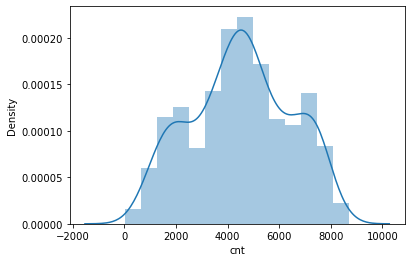

In [23]:
# Target Variable: Count of total rental bikes including both casual and registered
sns.distplot(df['cnt'])
plt.show()

**NOTE:** Not Skewed, follows a normal distribution

#### Distribution of temperature (temp) 

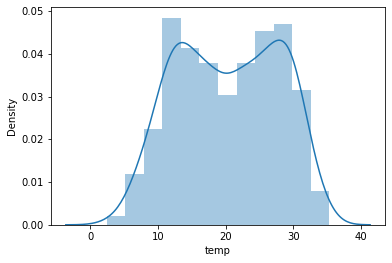

In [24]:
# temperature
sns.distplot(df['temp'])
plt.show()

**NOTE:** Not Skewed, slightly bimodel in nature

#### Distribution of adjusted temperature (atemp) 

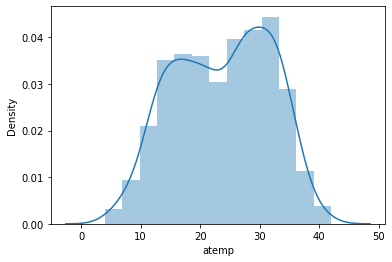

In [25]:
# adjusted temperature
sns.distplot(df['atemp'])
plt.show()

**NOTE:** Not Skewed, slightly bimodel in nature

#### Distribution of humidity (hum) 

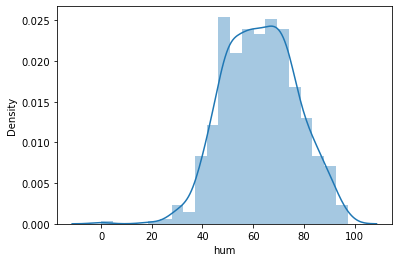

In [26]:
# humidity
sns.distplot(df['hum'])
plt.show()

**NOTE:** Slightly left skewed

#### Distribution of wind speed (windspeed) 

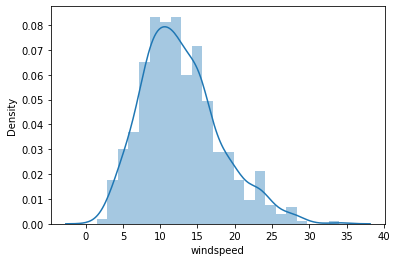

In [27]:
# wind speed
sns.distplot(df['windspeed'])
plt.show()

**NOTE:** Slightly right skewed

#### Visulaizing all categorical columns

In [28]:
df[cat_cols]

,season,mnth,weekday,weathersit
0,spring,Jan,Wed,B
1,spring,Jan,Thurs,B
2,spring,Jan,Fri,A
3,spring,Jan,Sat,A
4,spring,Jan,Sun,A
...,...,...,...,...
725,spring,Dec,Sun,B
726,spring,Dec,Mon,B
727,spring,Dec,Tues,B
728,spring,Dec,Wed,A


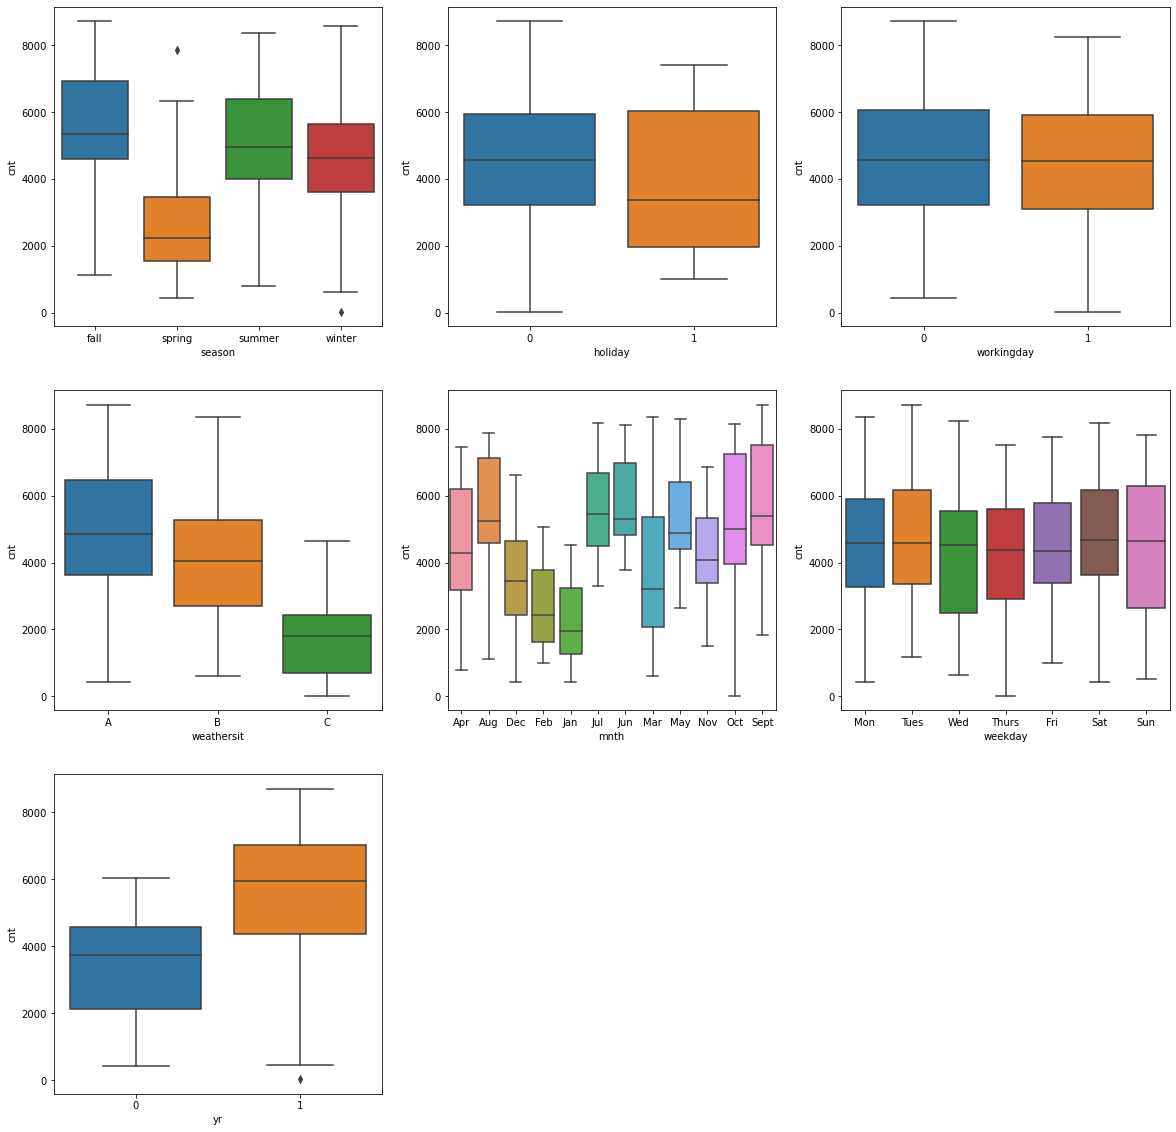

In [29]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df, order=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

#### Visulaizing all numeric columns

In [30]:
vars = ['casual', 'registered', 'cnt']
df[vars] = df[vars].astype("float")

In [31]:
# All numeric variables in the dataset
df_num = df.select_dtypes(include=['float64'])
df_num.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


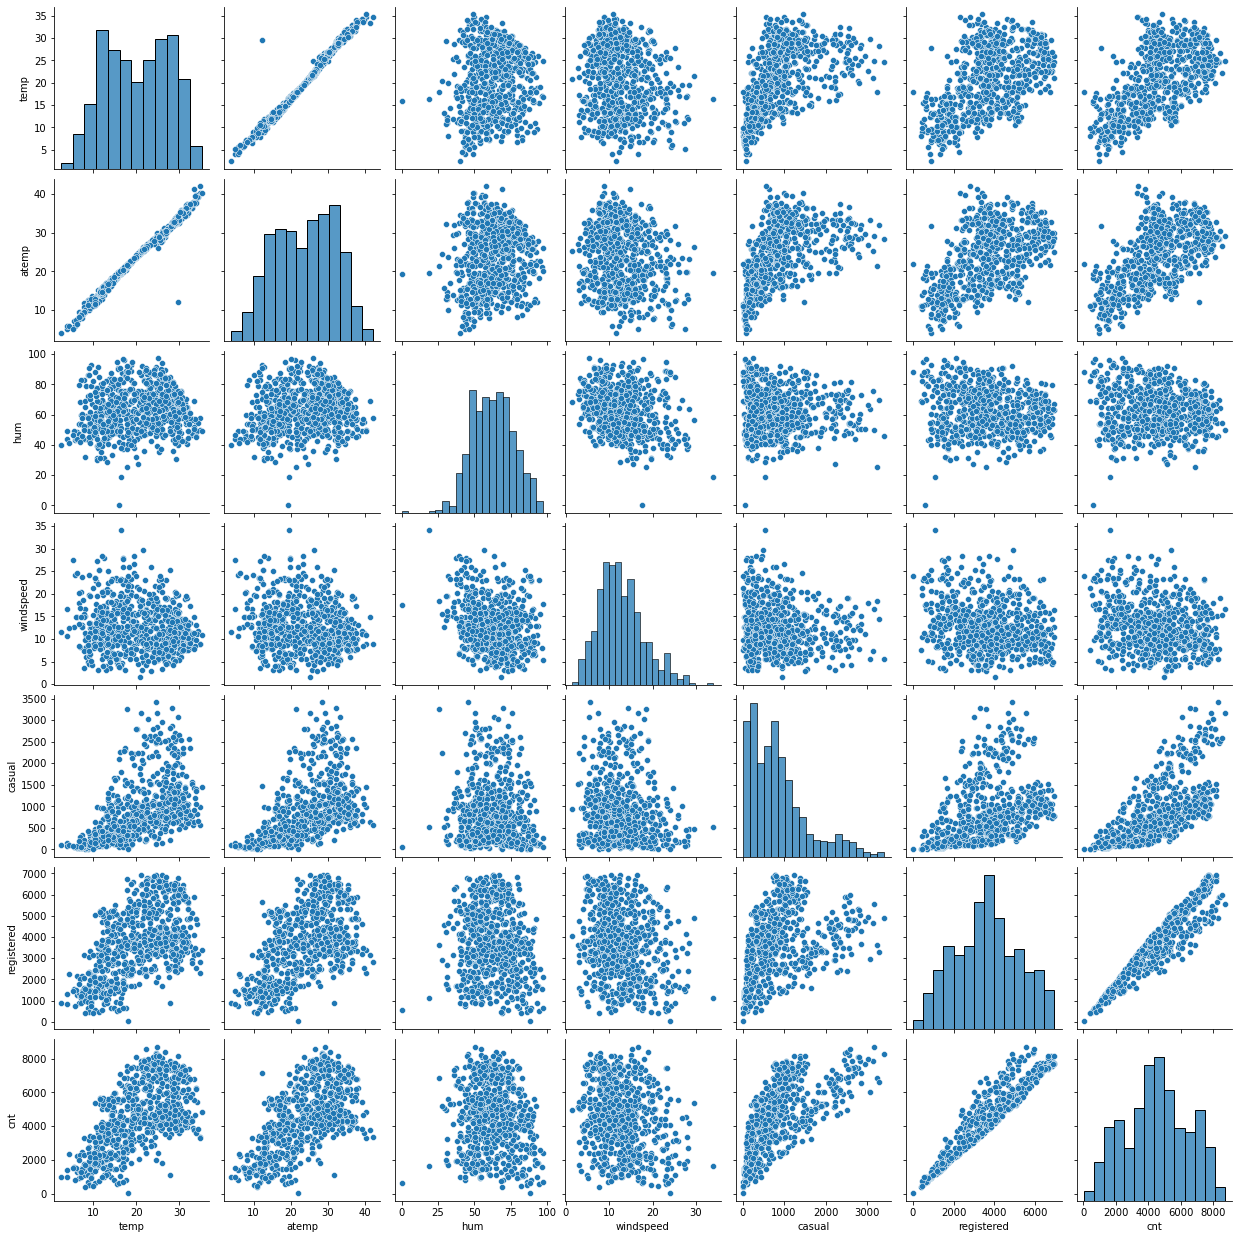

In [32]:
# Pairwise scatter plot
sns.pairplot(df_num)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [33]:
corr = df_num.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot:>

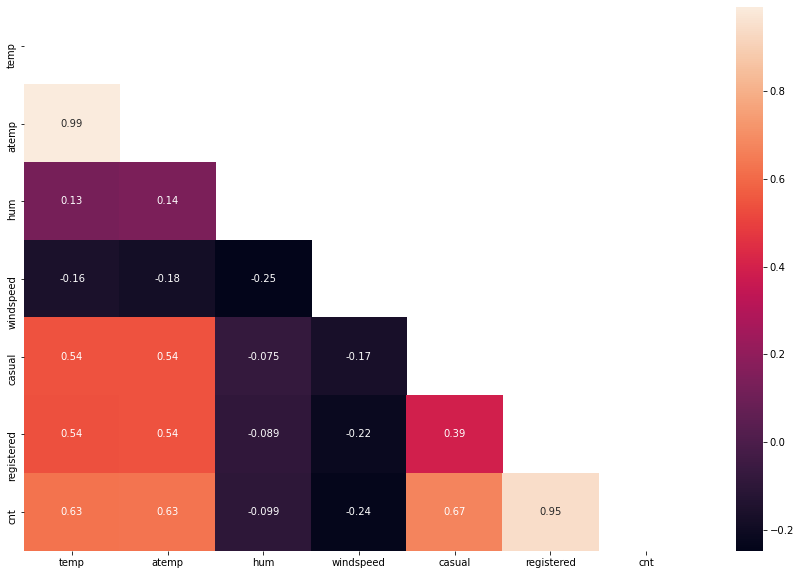

In [34]:
# Let's plot the correlation heat map
plt.figure(figsize=(15, 10))
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool)
sns.heatmap(corr, mask=mask_ut, annot=True)

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.


**NEED TO FIX #2:** 

* Remove variable which shows multicollinearity: `temp` and `atemp`.

* Remove the variables such as `casual` & `registered` as these variable adds upto the target variable `cnt`.

**FIX #2:**

In [35]:
# Remove atemp as it is highly correlated to temp
df.drop('atemp', axis=1, inplace=True)

In [36]:
# Remove casual and registered 
df.drop(['casual', 'registered'], axis=1, inplace=True)

In [37]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2018-01-01,spring,0,Jan,0,Wed,1,B,14.110847,80.5833,10.749882,985.0
1,2018-02-01,spring,0,Jan,0,Thurs,1,B,14.902598,69.6087,16.652113,801.0
2,2018-03-01,spring,0,Jan,0,Fri,1,A,8.050924,43.7273,16.636703,1349.0
3,2018-04-01,spring,0,Jan,0,Sat,1,A,8.200000,59.0435,10.739832,1562.0
4,2018-05-01,spring,0,Jan,0,Sun,1,A,9.305237,43.6957,12.522300,1600.0


### 5. Data Preparation

#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` are categorical in nature. We need to convert these variables into integers before feeding them to the model. 

For this, we will use something called `dummy variables`.

In [38]:
# Convert into dummies
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
# Drop categorical variable columns
df_new = df.drop(list(cat_cols), axis=1)

df_new.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,cnt
0,2018-01-01,0,0,1,14.110847,80.5833,10.749882,985.0
1,2018-02-01,0,0,1,14.902598,69.6087,16.652113,801.0
2,2018-03-01,0,0,1,8.050924,43.7273,16.636703,1349.0
3,2018-04-01,0,0,1,8.200000,59.0435,10.739832,1562.0
4,2018-05-01,0,0,1,9.305237,43.6957,12.522300,1600.0


In [40]:
df_new = pd.concat([df_new, df_dummies], axis=1)

df_new.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,2018-01-01,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,2018-02-01,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,2018-03-01,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-04-01,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2018-05-01,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
# Drop 'dteday' as it is of no use for this problem
df_new.drop('dteday', axis=1, inplace=True)
df_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### 6. Model Building and Evaluation

Let us train the model. The first step in model building is to split the dataset into trian and test set.

In [42]:
x = df_new.drop('cnt', axis=1)
y = df_new['cnt']

In [43]:
# Split the dataframe into train test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [44]:
x_train

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,65.9583,8.666718,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
79,0,0,1,17.647835,73.7391,19.348461,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

Let's scale all these columns using MinMaxScaler. You can use any other scaling method as well; it is totally up to you.

In [45]:
scaler = MinMaxScaler()

In [46]:
# Apply scaler to all columns except 'yes-no' and dummy variables
x_vars = ['temp', 'hum', 'windspeed']
y_var = ['cnt']

x_train[x_vars] = scaler.fit_transform(x_train[x_vars])
y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

In [47]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [48]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(x_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [50]:
x_train.shape

(511, 28)

### Building the first model with all the features

Let's now build our first model with all the features.

#### Fitting a StatsModel

In [53]:
x_train_lr = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_lr).fit()

In [54]:
lr.params

const            0.381756
yr               0.231568
holiday         -0.134667
workingday      -0.058803
temp             0.440170
hum             -0.158435
windspeed       -0.182540
season_spring   -0.040430
season_summer    0.046505
season_winter    0.112438
mnth_Aug         0.027488
mnth_Dec        -0.044112
mnth_Feb        -0.037340
mnth_Jan        -0.064186
mnth_Jul        -0.028246
mnth_Jun         0.008486
mnth_Mar         0.000909
mnth_May         0.024901
mnth_Nov        -0.039221
mnth_Oct         0.008646
mnth_Sept        0.091233
weekday_Mon     -0.045834
weekday_Sat      0.012777
weekday_Sun      0.008752
weekday_Thurs   -0.017503
weekday_Tues    -0.039604
weekday_Wed     -0.016079
weathersit_B    -0.058121
weathersit_C    -0.250743
dtype: float64

In [56]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.86
Date:                Thu, 15 Jul 2021   Prob (F-statistic):          3.74e-179
Time:                        16:11:22   Log-Likelihood:                 523.67
No. Observations:                 511   AIC:                            -989.3
Df Residuals:                     482   BIC:                            -866.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3818      0.084      4.530      0.000       0.216       0.547
yr                0.2316      0.008     28.446      0.000       0.216       0.248
holiday          -0.1347      0.065     -2.056      0.040      -0.263      -0.006
workingday       -0.0588      0.071     -0.826      0.409      -0.199       0.081
temp              0.4402      0.047      9.399      0.000       0.348       0.532
hum              -0.1584      0.039     -4.069      0.000      -0.235      -0.082
windspeed        -0.1825      0.026     -7.001      0.000      -0.234      -0.131
season_spring    -0.0404      0.030     -1.336      0.182      -0.100       0.019
season_summer     0.0465      0.026      1.762      0.079      -0.005       0.098
season_winter     0.1124      0.028      3.985      0.000       0.057       0.168
mnth_Aug          0.0275      0.034      0.810      0.418      -0.039       0.094
mnth_Dec         -0.0441      0.034     -1.300      0.194      -0.111       0.023
mnth_Feb         -0.0373      0.033     -1.120      0.263      -0.103       0.028
mnth_Jan         -0.0642      0.034     -1.893      0.059      -0.131       0.002
mnth_Jul         -0.0282      0.035     -0.800      0.424      -0.098       0.041
mnth_Jun          0.0085      0.025      0.339      0.735      -0.041       0.058
mnth_Mar          0.0009      0.025      0.037      0.971      -0.048       0.050
mnth_May          0.0249      0.021      1.171      0.242      -0.017       0.067
mnth_Nov         -0.0392      0.037     -1.068      0.286      -0.111       0.033
mnth_Oct          0.0086      0.036      0.239      0.811      -0.062       0.080
mnth_Sept         0.0912      0.032      2.833      0.005       0.028       0.155
weekday_Mon      -0.0458      0.071     -0.646      0.518      -0.185       0.093
weekday_Sat       0.0128      0.015      0.831      0.407      -0.017       0.043
weekday_Sun       0.0088      0.015      0.574      0.566      -0.021       0.039
weekday_Thurs    -0.0175      0.015     -1.171      0.242      -0.047       0.012
weekday_Tues     -0.0396      0.071     -0.559      0.576      -0.179       0.100
weekday_Wed      -0.0161      0.015     -1.067      0.286      -0.046       0.014
weathersit_B     -0.0581      0.011     -5.519      0.000      -0.079      -0.037
weathersit_C     -0.2507      0.027     -9.407      0.000      -0.303      -0.198
==============================================================================
Omnibus:                       79.021   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.836
Skew:                          -0.767   Prob(JB):                     2.72e-46
Kurtosis:                       5.739   Cond. No.                         70.1
================================================================

**FINDINGS:**

Model has Adjusted R-square value of __*84.2%*__ which seems pretty good.

Let's try to increase this score by removing the insignificant features.

#### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [64]:
# RFE with 15 features
lr = LinearRegression()
rfe1 = RFE(lr, 15)

rfe1.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [85]:
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True  True  True  True  True  True False  True False
  True  True False False False  True False  True False False False False
 False False  True  True]
[ 1  1  3  1  1  1  1  1  1  9  1  2  1  1 12 14  8  1 13  1  4 10 11  6
  5  7  1  1]


In [100]:
print("\033[1m"+"Most Important Features:"+"\033[0m")
print(*x_train.columns[rfe1.get_support(1)], sep='\n')

Most Important Features:
yr
holiday
temp
hum
windspeed
season_spring
season_summer
season_winter
mnth_Dec
mnth_Jan
mnth_Jul
mnth_Nov
mnth_Sept
weathersit_B
weathersit_C


#### Model Building and Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [103]:
# Subset the features selected by rfe1
cols = x_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
x_train_rfe1 = x_train[cols]

# Add a constant to the model
x_train_rfe1 = sm.add_constant(x_train_rfe1)
x_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_B,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


In [104]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, x_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Thu, 15 Jul 2021   Prob (F-statistic):          2.29e-189
Time:                        16:39:09   Log-Likelihood:                 514.84
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3206      0.036      8.882

**Note:** The new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from **84.2%** to **84.0%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [110]:
imp_feat = x_train_rfe1.drop('const', axis=1)

In [116]:
vif = pd.DataFrame()
vif['Features'] = imp_feat.columns
vif['VIF'] = [round(variance_inflation_factor(imp_feat.values, i), 2) for i in range(imp_feat.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,30.93
2,temp,17.82
4,windspeed,4.73
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
13,weathersit_B,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


In [117]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(lm, 7)

# Fit with 7 features
rfe2.fit(x_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True False  True  True  True False False  True False False False
 False False False False False False False False False False False False
 False False False  True]
[ 1  1 11  1  1  1  5  3  1 17  9 10  7  4 20 22 16  8 21  2 12 18 19 14
 13 15  6  1]


In [118]:
col2 = x_train.columns[rfe2.support_]

x_train_rfe2 = x_train[col2]

x_train_rfe2 = sm.add_constant(x_train_rfe2)
x_train_rfe2.head()

,const,yr,holiday,temp,hum,windspeed,season_winter,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,1,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0


In [120]:
# Fitting the model with 7 variables
lr2 = sm.OLS(y_train, x_train_rfe2).fit()   
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     282.4
Date:                Thu, 15 Jul 2021   Prob (F-statistic):          9.55e-170
Time:                        17:10:00   Log-Likelihood:                 445.89
No. Observations:                 511   AIC:                            -875.8
Df Residuals:                     503   BIC:                            -841.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2581      0.029      9.051

In [121]:
imp_feat_2 = x_train_rfe2.drop('const',axis=1)

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = imp_feat_2.columns
vif['VIF'] = [variance_inflation_factor(imp_feat_2.values, i) for i in range(imp_feat_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.80
2,temp,6.87
4,windspeed,3.42
0,yr,2.02
5,season_winter,1.49
6,weathersit_C,1.08
1,holiday,1.03


**NOTE:**

From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [124]:
x_train_rfe2.drop('hum', axis=1, inplace=True)
x_train_rfe2

,const,yr,holiday,temp,windspeed,season_winter,weathersit_C
653,1.0,1,0,0.509887,0.300794,1,0
576,1.0,1,0,0.815169,0.264686,0,0
426,1.0,1,0,0.442393,0.255342,0,0
728,1.0,1,0,0.245101,0.663106,0,0
482,1.0,1,0,0.395666,0.188475,0,0
...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0
53,1.0,0,0,0.202618,0.111379,0,0
350,1.0,0,0,0.248216,0.431816,1,0
79,1.0,0,0,0.462664,0.529881,0,0


In [126]:
x_train_rfe2 = sm.add_constant(x_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, x_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     293.1
Date:                Thu, 15 Jul 2021   Prob (F-statistic):          8.75e-161
Time:                        17:13:05   Log-Likelihood:                 421.94
No. Observations:                 511   AIC:                            -829.9
Df Residuals:                     504   BIC:                            -800.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1003      0.018      5.445

In [127]:
imp_feat_2 = x_train_rfe2.drop('const', axis=1)

In [128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = imp_feat_2.columns
vif['VIF'] = [variance_inflation_factor(imp_feat_2.values, i) for i in range(imp_feat_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.08
3,windspeed,2.81
0,yr,2.00
4,season_winter,1.25
5,weathersit_C,1.06
1,holiday,1.03


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `84.2%` with **28 variables** to just `77.5%` using **6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [130]:
y_train_pred = lm3.predict(x_train_rfe2)

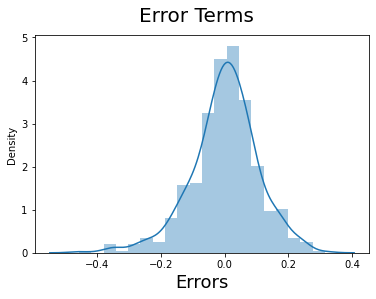

In [135]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train.ravel() - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)    
plt.show()

**NOTE:**
The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Make Predictions on test set

In [137]:
x_test

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,29.793347,63.7917,5.459106,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,32.082500,59.2083,7.625404,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,10.899153,68.7917,11.791732,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
702,1,0,1,19.509153,73.3750,11.666643,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,1,21.661653,63.1667,5.000712,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
640,1,0,1,26.957500,79.3750,4.458569,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


We need to first scale the test set.

In [164]:
# Apply scaler to all columns except 'yes-no' and dummy variables
x_vars = ['temp', 'hum', 'windspeed']
y_var = ['cnt']

x_test[x_vars] = scaler.fit_transform(x_test[x_vars])
y_test = scaler.fit_transform(np.array(y_test).reshape(-1, 1))

In [165]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.837241,0.534223,0.149393,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.911423,0.470417,0.231142,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.496221,0.777843,0.443398,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
221,0,0,1,0.890387,0.236659,0.449707,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,0,0.821739,0.070765,0.682387,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [168]:
x_test_rfe2 = x_test[x_train_rfe2.drop('const', axis=1).columns]

In [171]:
# Add a constant to the test set created
x_test_rfe2 = sm.add_constant(x_test_rfe2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_winter  219 non-null    uint8  
 6   weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(2)
memory usage: 18.8 KB


In [172]:
y_test_pred = lm3.predict(x_test_rfe2)

Text(0, 0.5, 'y_pred')

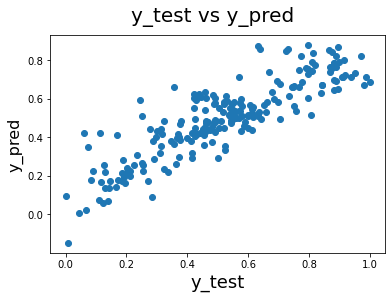

In [174]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [176]:
# r2_score for 6 variables

r2_score(y_test, y_test_pred)

0.7416792830443308

Thus, for the model with 6 variables, the r-squared on training and test data is about 77.7% and 74.16% respectively. The adjusted r-squared on the train set is about is about 77.5%.

#### Checking the correlations between the final predictor variables

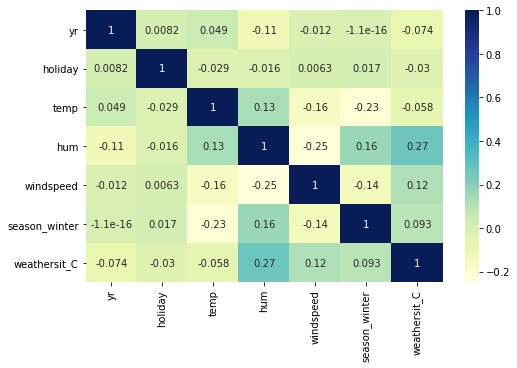

In [180]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(df_new[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations. 

Thus, the final model consists of the 6 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.

### Conclusion

The features such as `temperature`, `humidity`,` windspeed`, `season` and `weather` are responsible for increase or decrease| in the demand of the bikes.
